# Algorithms Exercise 1

## Imports

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [72]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    out = []
    for l in s.splitlines():
        out.extend(str.split(l))
    for i in range(0, len(out)):
        out[i] = [x for x in out[i] if not(x in punctuation)]
        out[i] = ''.join(out[i]).lower()
    if(type(stop_words) == str): stop_words = stop_words.split()
    return [x for x in out if not(x in (stop_words or []))]

In [73]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [74]:
def count_words(data):
    out = {}
    for w in data:
        if w in out: out[w] += 1
        else: out[w] = 1
    return out

In [75]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [76]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    out = [(x, wc[x]) for x in wc];
    return sorted(out, key=lambda k: k[1], reverse=True)

In [77]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [80]:
# YOUR CODE HERE
swc = []
with open("mobydick_chapter1.txt") as file:
    string = file.read()
    swc = sort_word_counts(count_words(tokenize(string, stop_words='the of and a to in is it that as')));
    
print(len(swc))

843


In [81]:
assert swc[0]==('i',43)
assert len(swc)==848

AssertionError: 

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

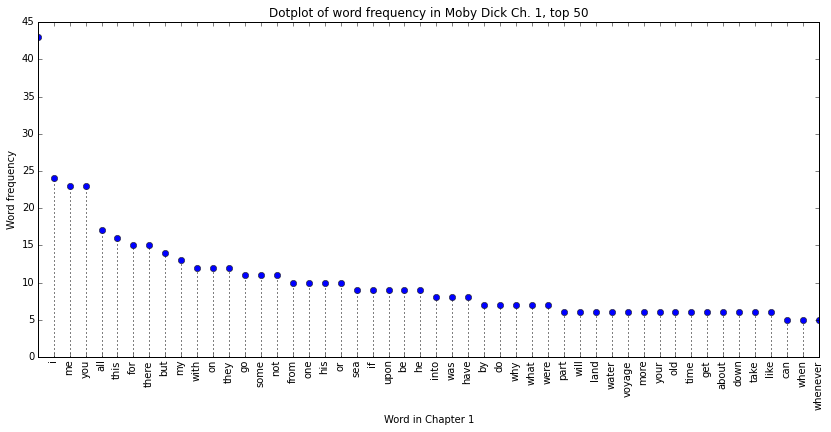

In [124]:
# YOUR CODE HERE
words = [x[0] for x in swc[:50]]
count = [x[1] for x in swc[:50]]
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.plot(count, 'o')
plt.gca().xaxis.set_ticks(range(1,51))
plt.gca().xaxis.set_ticklabels(words, rotation=90);
plt.gcf().set_size_inches(14,6)
for i in range(1,50):
    plt.vlines(i, 0, count[i], linestyle='dotted')
plt.xlabel("Word in Chapter 1")
plt.ylabel("Word frequency")
plt.title("Dotplot of word frequency in Moby Dick Ch. 1, top 50");

In [ ]:
assert True # use this for grading the dotplot